# Project 2: ML Classification

The notebook explains how to create a ML model to predict death and survival for the Titanic passengers. Passengers' data are available here: https://www.kaggle.com/c/titanic. The notebook was developed as as study project for the Spiced Academy Data Science Bootcamp.

## Imports

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

## Titanic dataset

In [205]:
df =pd.read_csv("train.csv", index_col = False)

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory data analysis

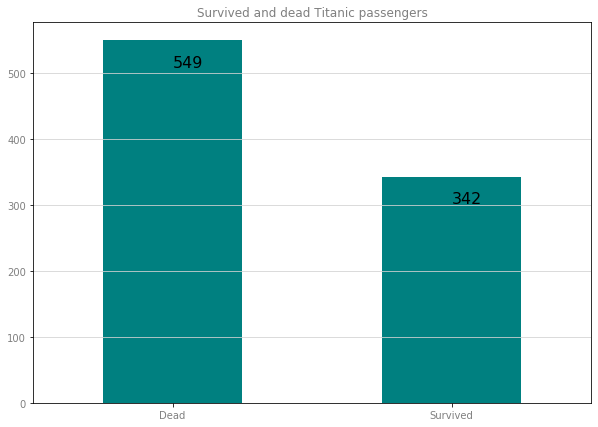

In [7]:
plt.figure(figsize=(10, 7))
ds_plot = df['Survived'].value_counts().plot(kind='bar', color = 'teal')
plt.xticks(ticks=[0, 1], labels=['Dead', 'Survived'], color ='grey', rotation =0)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')
plt.title("Survived and dead Titanic passengers", color ='grey')

for index,data in enumerate(df['Survived'].value_counts()):
    plt.text(x=index , y =data-40, s=f"{data}" , fontdict=dict(fontsize=16));


In [14]:
#Survival percentage per passengers' class
survived_1c = df[(df['Pclass'] == 1) & (df['Survived']==1)].shape[0]
firstc_pass = df[df['Pclass'] == 1].shape[0]
prop_surv_1cp = (survived_1c/firstc_pass)*100

print("Percentage of first class passengers survived: ", round(prop_surv_1cp,2))

survived_2c = df[(df['Pclass'] == 2) & (df['Survived']==1)].shape[0]
secondc_pass = df[df['Pclass'] == 2].shape[0]
prop_surv_2cp = (survived_2c/secondc_pass)*100

print("Percentage of second class passengers survived: ", round(prop_surv_2cp,2))

survived_3c = df[(df['Pclass'] == 3) & (df['Survived']==1)].shape[0]
thirdc_pass = df[df['Pclass'] == 3].shape[0]
prop_surv_3cp = (survived_3c/thirdc_pass)*100

print("Percentage of third class passengers survived: ", round(prop_surv_3cp,2))

  

Percentage of first class passengers survived:  62.96
Percentage of second class passengers survived:  47.28
Percentage of third class passengers survived:  24.24


{'Women in 1 class': 94, 'Women in 2 class': 76, 'Women in 3 class': 144} {'Men 1 class': 122, 'Men 2 class': 108, 'Men 3 class': 347}


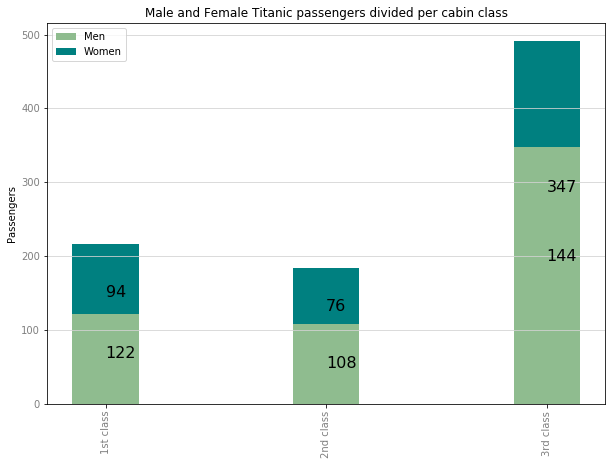

In [20]:
#Plot of survival per gender and passengers' class
pass_dict_female = { }	
for shipclass in range (1,4):
    pass_dict_female.update({'Women in '+str(shipclass)+' class': df[(df['Pclass'] == shipclass) 
                                                         & (df['Sex']=='female')].shape[0]})

    
pass_dict_male = { }
for shipclass in range (1,4):
    pass_dict_male.update({'Men '+str(shipclass)+' class': df[(df['Pclass'] == shipclass) 
                                                         & (df['Sex']=='male')].shape[0]})
    
print(pass_dict_female, pass_dict_male)


labels = ['1st class', '2nd class', '3rd class']
men = list(pass_dict_male.values())
women = list(pass_dict_female.values())
width = 0.30


fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(labels, men, width, label='Men', color = 'darkseagreen' )
ax.bar(labels, women, width, bottom=men, color = 'teal',
       label='Women')

ax.set_ylabel('Passengers')
ax.set_title('Male and Female Titanic passengers divided per cabin class')
ax.legend()
plt.xticks(color ='grey', rotation =90)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')

for index,data in enumerate(men):
    plt.text(x=index , y =data-60, s=f"{data}" , fontdict=dict(fontsize=16))

for index,data in enumerate(women):
    plt.text(x=index , y =data+50, s=f"{data}" , fontdict=dict(fontsize=16));

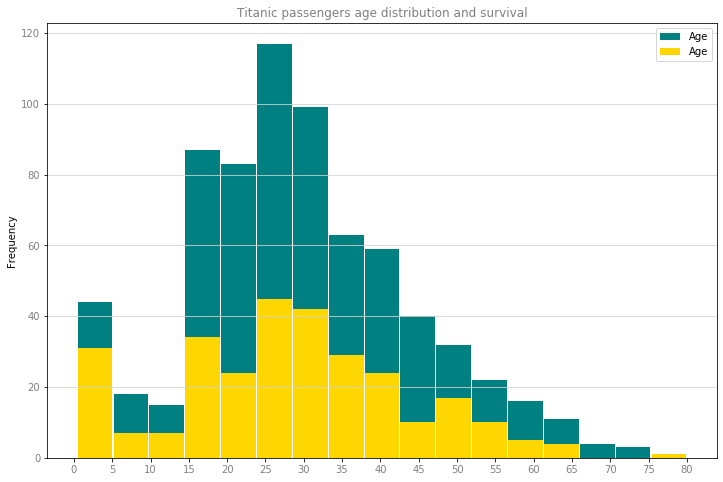

In [21]:
# Plot of age distribution and survival rate
plt.figure(figsize=(12,8))
df['Age'].plot.hist(bins =17, rwidth =0.97, color = 'teal')
df[df['Survived']==1]['Age'].plot.hist(bins =17, rwidth =0.97, color = 'gold')
plt.xticks(np.arange(0, 85, 5), color ='grey', rotation =0)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')
labels = ['Passengers age', 'Survived passengers']
my_lg=plt.legend()
#my_lg[1].text() = 'Survived passengers'
plt.title("Titanic passengers age distribution and survival", color ='grey');

In [215]:
#Average age survivors and dead passengers
av_age_surv = df[df['Survived']==1]['Age'].mean()
print("Average age for Titanic survivors (years): ", round(av_age_surv,2))
av_age_dead = df[df['Survived']==0]['Age'].mean()
print("Average age for Titanic dead passengers (years): ", round(av_age_dead,2))


Average age for Titanic survivors (years):  28.34
Average age for Titanic dead passengers (years):  30.63


In [216]:
#Mean age Titanic passengers
mean_age = round(df['Age'].mean(), 1)
print(mean_age)



29.7


In [217]:
#df['Age'] = df['Age'].fillna(mean_age)


In [218]:
    df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.7 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [219]:
contingency_titanic = pd.crosstab(index=df['Survived'], columns= [df['Pclass'], df['Sex']])
print(contingency_titanic)

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47


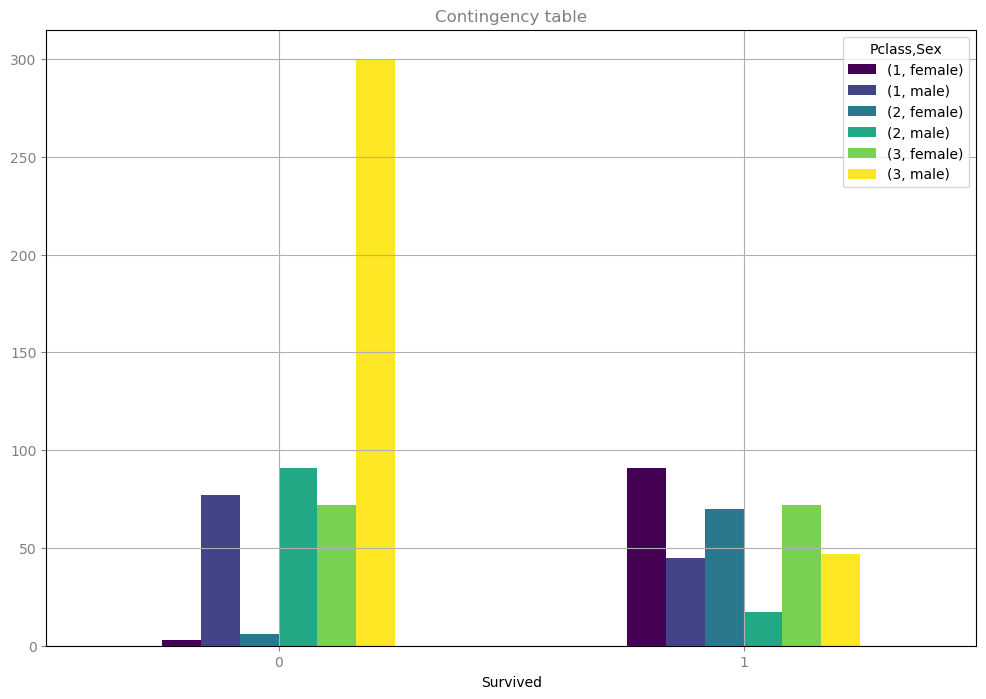

In [220]:
contingency_titanic.plot(kind='bar', stacked=False, colormap='viridis',
                         figsize=(12,8), grid = True)
plt.tick_params(axis='x', colors='grey',  rotation =0)
plt.tick_params(axis='y', colors='grey')
plt.title("Contingency table",color='grey');

## Feature Engineering

In [221]:
#Checking the data available for feature engineering
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# Drop the 'Survived' column
#It cannot be used for feature engineering because it is the variable the model should predict
df_feature_eng_titanic = df.drop(columns =['Survived'], axis =1)


In [24]:
df_feature_eng_titanic.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

** In the logistic regression model I will include only the data related to travel class, gender and age that the exploratory data analysis suggested as key factors for survival.

## Split train-test

In [34]:
X = df_feature_eng_titanic
y = df['Survived']

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

print(Xtrain)

     PassengerId  Pclass                              Name     Sex    Age  \
298          299       1             Saalfeld, Mr. Adolphe    male    NaN   
884          885       3            Sutehall, Mr. Henry Jr    male  25.00   
247          248       2   Hamalainen, Mrs. William (Anna)  female  24.00   
478          479       3         Karlsson, Mr. Nils August    male  22.00   
305          306       1    Allison, Master. Hudson Trevor    male   0.92   
..           ...     ...                               ...     ...    ...   
106          107       3  Salkjelsvik, Miss. Anna Kristine  female  21.00   
270          271       1             Cairns, Mr. Alexander    male    NaN   
860          861       3           Hansen, Mr. Claus Peter    male  41.00   
435          436       1         Carter, Miss. Lucile Polk  female  14.00   
102          103       1         White, Mr. Richard Frasar    male  21.00   

     SibSp  Parch           Ticket      Fare    Cabin Embarked  
298      0

In [220]:
# Checking missing data
print("Null values in column 'Pclass': ", df_feature_eng_titanic['Pclass'].isna().sum())
print("Null values in column 'Sex': ", df_feature_eng_titanic['Sex'].isna().sum())
print("Null values in column 'Age': ", df_feature_eng_titanic['Age'].isna().sum())
print("Null values in column 'Fare': ", df_feature_eng_titanic['Fare'].isna().sum())
print("Null values in column 'Cabin': ", df_feature_eng_titanic['Cabin'].isna().sum())
print("Null values in column 'Embarked': ", df_feature_eng_titanic['Embarked'].isna().sum())

Null values in column 'Pclass':  0
Null values in column 'Sex':  0
Null values in column 'Age':  177
Null values in column 'Fare':  0
Null values in column 'Cabin':  687
Null values in column 'Embarked':  2


In [118]:
pipeline_age = make_pipeline(
    SimpleImputer(strategy='mean'), 
    KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform'),
)


In [119]:
def name_cabin(df):
    cabin = df['Cabin'].fillna('X')
    name = cabin.str[0]
    return name.values.reshape(-1, 1)


pipeline_cabin = make_pipeline(
    FunctionTransformer(name_cabin),
    OneHotEncoder(sparse=False, handle_unknown='ignore'),
)


In [222]:
pipeline_embarked = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='X' ),
    OneHotEncoder(sparse=False, handle_unknown='ignore'),
)

In [223]:
#ColumnTransformer automatically drops the columns not explicitly mentioned (unless other param. are given)
trans = ColumnTransformer([
   ('one_hot_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Pclass','Sex']),
    ('impute_and_bin', pipeline_age, ['Age']),
    ('scale', MinMaxScaler(), ['Fare']),
    ('cabin', pipeline_cabin, ['Cabin']),
    ('embarked', pipeline_embarked, ['Embarked']),
])

In [224]:
trans.fit(Xtrain, ytrain)
Xtrain_transform = trans.transform(Xtrain)  # result is a single numpy array
Xtrain_transform.shape

(668, 24)

In [225]:
Xtrain_transform

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

## Logistic regression

In [226]:
model = LogisticRegression()
model.fit(Xtrain_transform, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
Xtest_transform = trans.transform(Xtest)
Xtest_transform.shape

(223, 24)

In [228]:
ypred = model.predict(Xtrain_transform)
acc = accuracy_score(ytrain, ypred)
round(acc, 2) #same as accuracy_score(ytrain, ypred)

0.81

In [229]:
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       415
           1       0.76      0.74      0.75       253

    accuracy                           0.81       668
   macro avg       0.80      0.80      0.80       668
weighted avg       0.81      0.81      0.81       668



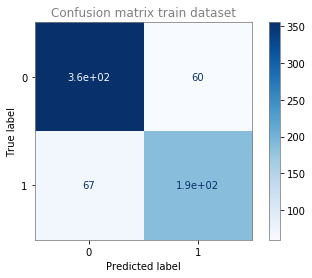

In [230]:
cm = plot_confusion_matrix(model, Xtrain_transform, ytrain,
                                 cmap=plt.cm.Blues)
plt.title("Confusion matrix train dataset",color='grey');

In [231]:
Xtest_transform = trans.transform(Xtest)
Xtest_transform.shape

(223, 24)

In [232]:
ypred_test = model.predict(Xtest_transform)
acc = accuracy_score(ytest, ypred_test)
round(acc, 2)

0.77

In [203]:
#probs = model.predict_proba(Xtrain_transform)
#plot_roc_curve(ytrain, ypred)

TypeError: plot_roc_curve() missing 1 required positional argument: 'y'